In [1]:
import pandas as pd
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

2.0000000000000003e-06, 3.3362010744001187e-06, 5.565118804414253e-06, 9.283177667225566e-06, 1.5485273653622557e-05, 2.5830993300297657e-05, 4.308869380063765e-05, 7.187627327609252e-05, 0.00011989685006378819, 0.00020000000000000004, -----------------
1.0, 1.6681005372000588, 2.7825594022071245, 4.641588833612778, 7.742636826811269, 12.91549665014884, 21.544346900318832, 35.93813663804626, 59.94842503189409, 100.0, 

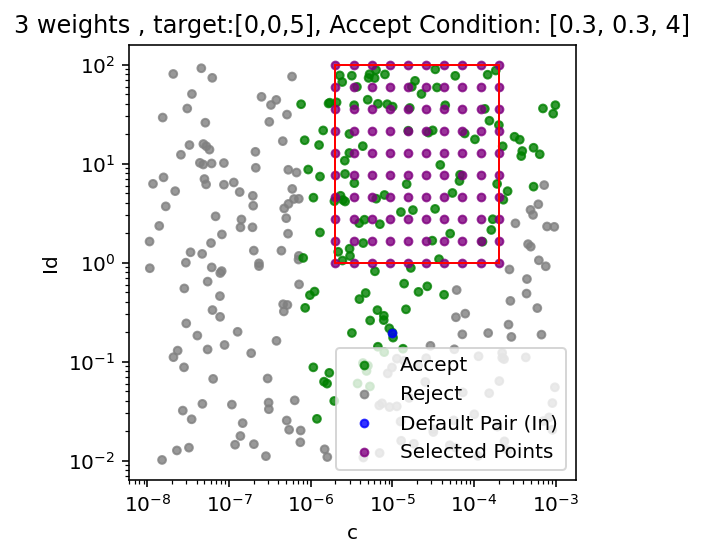

In [5]:
data = pd.read_csv("3weights-cap/mc_detumble_wz5_3weightsI_2hr.txt",header=None)
wx = data.iloc[:,0]
wy = data.iloc[:,1]
wz = data.iloc[:,2]
c  =  data.iloc[:,3]
Id  =  data.iloc[:,4]
###############

#[0,90]
wx_tor =0.3
wy_tor =0.3
wz_tor =4


# Define the color based on the range of the first column
color = []
# 
def within_cov_tor(wx, wy, wz):
    if abs(float(wx))<=wx_tor and abs(float(wy))<=wy_tor and float(wz)>=wz_tor:
        return True
    else:
        return False

for i in range(len(data)):
    if within_cov_tor(wx[i],wy[i],wz[i]):
        color.append("green")
    else:
        color.append('gray')

%config InlineBackend.figure_format = 'retina'
plt.figure(figsize=(4, 4))

plt.scatter(c,Id,c=color,s=15, alpha=0.8)
plt.scatter(0,0,color='green',s=15, alpha=0.8,label="Accept")
plt.scatter(0,0,color='gray',s=15, alpha=0.8,label="Reject")

plt.scatter(c[0],Id[0],color='blue' if within_cov_tor(wx[0],wy[0],wz[0]) else 'red',s=15, alpha=0.8,label=('Default Pair (In)' if within_cov_tor(wx[0],wy[0],wz[0]) else 'Default Pair (Out)'))


plt.title("3 weights , target:[0,0,5], Accept Condition: [" +str(wx_tor)+", "+str(wy_tor)+", "+ str(wz_tor)+"]")


points = [
    (2e-6, 1),  # Bottom left
    (2e-4, 1),  # Bottom right
    (2e-4, 100),  # Top right
    (2e-6, 100)  # Top left
]

# Calculate the bottom left corner and the width and height of the rectangle
# For log scale, use the min and max directly
bottom_left_x = min(points, key=lambda t: t[0])[0]
bottom_left_y = min(points, key=lambda t: t[1])[1]
top_right_x = max(points, key=lambda t: t[0])[0]
top_right_y = max(points, key=lambda t: t[1])[1]

width = top_right_x - bottom_left_x
height = top_right_y - bottom_left_y
# Calculate the log of the coordinates
log_bottom_left_x = np.log10(bottom_left_x)
log_bottom_left_y = np.log10(bottom_left_y)
log_top_right_x = np.log10(top_right_x)
log_top_right_y = np.log10(top_right_y)

# Create a grid of points in log space

rows = 10
cols =10

log_space_x = np.linspace(log_bottom_left_x, log_top_right_x, cols)
log_space_y = np.linspace(log_bottom_left_y, log_top_right_y, rows)

# Create a meshgrid, which gives us the x and y coordinates of the points
log_samples_x, log_samples_y = np.meshgrid(log_space_x, log_space_y)

# Flatten the meshgrid arrays to get a list of x and y coordinates
log_samples_x = log_samples_x.flatten()
log_samples_y = log_samples_y.flatten()

# Transform back to linear space
samples_c = 10 ** log_samples_x
samples_Id = 10 ** log_samples_y

# Print the sampled pairs
for c in np.unique(samples_c):
    print(str(c)+", ", end="")
print("-----------------")
for Id in np.unique(samples_Id):
    print(str(Id)+", ", end="")


plt.scatter(samples_c, samples_Id, color='purple', s=15, alpha=0.8, label="Selected Points")

# Create the rectangle patch
rect = patches.Rectangle((bottom_left_x, bottom_left_y), width, height, linewidth=1, edgecolor='r', facecolor='none')

plt.xscale("log")
plt.yscale("log")
# Add the rectangle to the plot
plt.gca().add_patch(rect)

plt.xlabel("c")
plt.ylabel("Id")
plt.legend(loc="lower right")

plt.show()

In [8]:
c_lower = 10e-8
c_upper = 10
more_c = np.logspace(np.log10(c_lower), np.log10(c_upper), num=20)

more_c= np.concatenate((np.unique(samples_c), more_c))

for c in more_c:
    print(f"{c}, ", end="")
    


2.0000000000000003e-06, 3.3362010744001187e-06, 5.565118804414253e-06, 9.283177667225566e-06, 1.5485273653622557e-05, 2.5830993300297657e-05, 4.308869380063765e-05, 7.187627327609252e-05, 0.00011989685006378819, 0.00020000000000000004, 1e-07, 2.6366508987303554e-07, 6.951927961775605e-07, 1.8329807108324375e-06, 4.832930238571752e-06, 1.274274985703132e-05, 3.359818286283781e-05, 8.858667904100833e-05, 0.00023357214690901214, 0.0006158482110660261, 0.001623776739188721, 0.004281332398719396, 0.011288378916846883, 0.02976351441631313, 0.07847599703514607, 0.20691380811147903, 0.5455594781168515, 1.43844988828766, 3.792690190732246, 10.0, 

In [9]:
Id_lower = 10e-3
Id_upper = 10e3

more_Id = np.logspace(np.log10(Id_lower), np.log10(Id_upper), num=20)

more_Id= np.concatenate((np.unique(samples_Id), more_Id))

for Id in more_Id:
    print(f"{Id}, ", end="")

1.0, 1.6681005372000588, 2.7825594022071245, 4.641588833612778, 7.742636826811269, 12.91549665014884, 21.544346900318832, 35.93813663804626, 59.94842503189409, 100.0, 0.01, 0.0206913808111479, 0.04281332398719394, 0.08858667904100823, 0.18329807108324356, 0.37926901907322497, 0.7847599703514611, 1.623776739188721, 3.359818286283781, 6.951927961775605, 14.38449888287663, 29.76351441631316, 61.584821106602604, 127.42749857031322, 263.6650898730355, 545.5594781168514, 1128.8378916846884, 2335.7214690901214, 4832.930238571752, 10000.0, 

In [33]:
np.logspace(np.log10(Id_lower), np.log10(Id_upper), num=20)

array([1.00000000e+01, 3.79269019e+00, 1.43844989e+00, 5.45559478e-01,
       2.06913808e-01, 7.84759970e-02, 2.97635144e-02, 1.12883789e-02,
       4.28133240e-03, 1.62377674e-03, 6.15848211e-04, 2.33572147e-04,
       8.85866790e-05, 3.35981829e-05, 1.27427499e-05, 4.83293024e-06,
       1.83298071e-06, 6.95192796e-07, 2.63665090e-07, 1.00000000e-07])